In [1]:
import pandas as pd
import os
import jieba
import jieba.posseg as pseg
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
#匯入20200808爬蟲資料
df = pd.read_csv('C:\\Users\\caac1\\Desktop\\中文分析\\御香屋\\review_20200808.txt', sep='\t', header = 0)
df

,index,username,time,comment,star
0,0,林冠佑,NaN,None,5
1,1,Cian Wun Chen,NaN,去了三次都公休...\n是一間很容易公休的飲料店..,4
2,2,Kiam Hsu,20200807.0,葡萄柚綠新鮮好喝，不過應該是生意太好我們點了三杯也收了錢結果只給我們一杯，反應後補的兩杯也沒...,2
3,3,Ling C.,20200807.0,平常不特別愛喝含糖飲料\n但他們家的招牌葡萄柚果粒茶 \n真的是酷暑下的聖品啊！,4
4,4,陳有德,20200807.0,None,4
...,...,...,...,...,...
3995,5,陳園霖,20160808.0,None,5
3996,6,Tzu Lung Chang,20160808.0,None,3
3997,7,Richard Wang,20160808.0,喝過一次還不錯喝~~但是就是貴了點Orz,4
3998,8,Miffy Li,20160808.0,飲料調製恰到好處，各種飲料在屏幕上都有介紹其產地及口感，強調農產品皆符合標準，飲用更安心。,4


In [3]:
#取出前20個
text = df['comment'].to_string(index = False)
words = jieba.lcut(text, cut_all=False)
tags = jieba.analyse.extract_tags(text, 20)
print(tags)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\caac1\AppData\Local\Temp\jieba.cache
Loading model cost 0.733 seconds.
Prefix dict has been built successfully.


['None', '好喝', '葡萄柚', '綠茶', '...', '排隊', '飲料', 'Google', '翻譯', '評論', '原始', '檸檬', '果肉', '提供', '梅子', '人潮', '電話', '真的', '凍頂', '招牌']


In [4]:
#將None ... Google 翻譯 評論 原始 提供 等字詞作為stopwords
os.chdir("C:\\Users\\caac1\\Desktop\\google review\\")
stop_tags = jieba.analyse.set_stop_words('stopwords.txt')
tags = jieba.analyse.extract_tags(text, 20)
print(tags)

['None', '好喝', '葡萄柚', '綠茶', '排隊', '飲料', 'Google', '檸檬', '果肉', '梅子', '人潮', '電話', '凍頂', '招牌', '建議', '打電話', '不錯', '推薦', '實料', '真材']


In [5]:
#雖然有將英文加入stopwords.txt，但只有中文有去掉，透過replace將英文去掉
text = text.replace('Google', '').replace('None', '')
stop_tags = jieba.analyse.set_stop_words('stopwords.txt')
tags = jieba.analyse.extract_tags(text, 20)
print(tags)

['好喝', '葡萄柚', '綠茶', '排隊', '飲料', '檸檬', '果肉', '梅子', '人潮', '電話', '凍頂', '招牌', '建議', '打電話', '不錯', '推薦', '實料', '真材', '不會', '很多']


star 1
['排隊', '飲料', '葡萄柚', '沒有', '不會', '綠茶', '好喝', '態度', '電話', '超難', '感覺', '一杯', '什麼', '喝過', '這樣', '現場', '員工', '60', '行銷', '太酸']


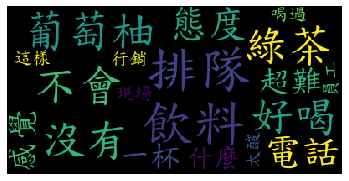

star 2
['葡萄柚', '綠茶', '排隊', '好喝', '飲料', '梅子', '點了', '人潮', '味道', '結果', '沒有', '現場', '60', '普通', '不過', '應該', '我們', '兩口', '還好', '加綠茶']


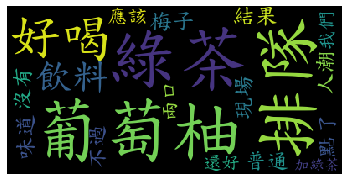

star 3
['葡萄柚', '好喝', '綠茶', '排隊', '飲料', '人潮', '覺得', '沒有', '點了', '中杯', '不錯', '還好', '價格', '感覺', '檸檬', '還是', '還不錯', '有點', '普通', '口味']


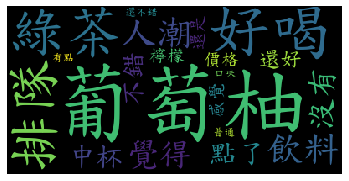

star 4
['葡萄柚', '好喝', '綠茶', '排隊', '飲料', '人潮', '不錯', '電話', '檸檬', '不過', '招牌', '梅子', '建議', '果粒', '凍頂', '果肉', '打電話', '實料', '預訂', '推薦']


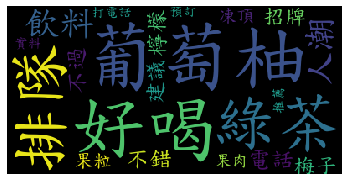

star 5
['好喝', '葡萄柚', '綠茶', '飲料', '排隊', '果肉', '檸檬', '梅子', '打電話', '電話', '凍頂', '推薦', '建議', '實料', '招牌', '人潮', '真材', '嘉義必', '雖然', '滿滿']


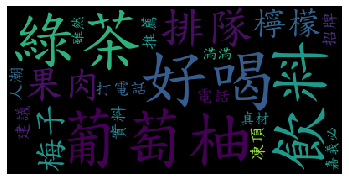

In [6]:
os.chdir("C:\\Users\\caac1\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\")
font_path = './KAIU.TTF' # 標楷體

for i in range(1,6):
    df_star = df[pd.to_numeric(df['star']) == i]
    text = df_star['comment'].to_string(index = False).replace('Google', '').replace('None', '')
    words = jieba.lcut(text, cut_all=False)
    tags = jieba.analyse.extract_tags(text, 20)
    #seg_list = words
    #seg_list = ' '.join(seg_list)
    seg_list = ' '.join(tags)
    wc = WordCloud(background_color='black',font_path=font_path)
    wc.generate(seg_list)
    
    print('star',i)
    print(tags)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

In [ ]:
from gensim.models import Word2Vec
myWord2Vec = 